In [1]:
from random import shuffle
from turtle import forward
import torch
import torchvision
import torchvision.transforms as transforms

# transform = transforms.Compose(
#     [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
# )

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import os
from PIL import Image

In [2]:
classes = ('零', '一', '二', '三', '四', '五', '六', '七', '八', '九', '十', '百', '千', '万', '亿')

In [3]:
class Net(nn.Module):
    """a naive fully-connected net"""
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1 * 64 * 64, 300)
        self.fc2 = nn.Linear(300, 80)
        self.fc3 = nn.Linear(80, 15)
 
    def forward(self, x):
        x = x.reshape(x.size(0), -1)
        x = self.fc1(x)  # [batch_size,300]
        x = F.relu(x)  # [batch_size,300]
        x = self.fc2(x)  # [batch_size,80]
        x = F.relu(x)  # [batch_size,80]
        x = self.fc3(x)  # [batch_size,15]
        # return x
        return F.log_softmax(x, dim=-1)

net = Net()
optimizer = optim.Adam(net.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
train_loss_list = []

In [4]:
print(net)

Net(
  (fc1): Linear(in_features=4096, out_features=300, bias=True)
  (fc2): Linear(in_features=300, out_features=80, bias=True)
  (fc3): Linear(in_features=80, out_features=15, bias=True)
)


In [5]:
path_dir = 'archive/data/data'
batch_size = 4
num_epoches = 5

In [6]:
from torch.utils.data import Dataset, DataLoader

class myDataset(Dataset):
    def __init__(self, path_dir, transform=None):
        self.path_dir = path_dir
        self.transform = transform
        self.images = os.listdir(self.path_dir)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        image_index = self.images[index]
        img_path = os.path.join(self.path_dir, image_index)
        img = Image.open(img_path)

        label = img_path.split('/')[-1].split('.')[0].split('_')[-1]
        label = int(label)
        label = label - 1

        img = self.transform(img)
        return img, label

train_set = myDataset(path_dir, transform=torchvision.transforms.ToTensor())
train_loader = DataLoader(train_set, batch_size, shuffle=True)

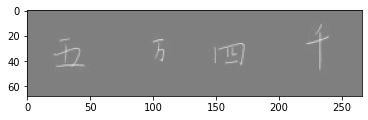

五     万     四     千    


In [7]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [8]:
# 开始训练！
for epoch in range(num_epoches):
    correct, total = 0, 0
    for i, (data, target) in enumerate(train_loader):

        optimizer.zero_grad()
        outputs = net(data)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()
        acc = correct / total
        if i % 117 == 0 and i != 0:    # print every 2000 mini-batches
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\tAccuracy: {:.2f} %'
                .format(epoch+1, (i)* batch_size, len(train_set), 100. * (i) / len(train_loader), loss.item(), 100 * acc))

        train_loss_list.append(loss.item())

print("Finish Training.")

Train Epoch: 1 [468/15000 (3%)]	Loss: 2.525967	Accuracy: 11.44 %
Train Epoch: 1 [936/15000 (6%)]	Loss: 2.143916	Accuracy: 17.23 %
Train Epoch: 1 [1404/15000 (9%)]	Loss: 2.083465	Accuracy: 22.59 %
Train Epoch: 1 [1872/15000 (12%)]	Loss: 2.518023	Accuracy: 25.85 %
Train Epoch: 1 [2340/15000 (16%)]	Loss: 0.613072	Accuracy: 29.91 %
Train Epoch: 1 [2808/15000 (19%)]	Loss: 1.249072	Accuracy: 33.53 %
Train Epoch: 1 [3276/15000 (22%)]	Loss: 2.002075	Accuracy: 35.67 %
Train Epoch: 1 [3744/15000 (25%)]	Loss: 1.034251	Accuracy: 37.35 %
Train Epoch: 1 [4212/15000 (28%)]	Loss: 1.542152	Accuracy: 39.52 %
Train Epoch: 1 [4680/15000 (31%)]	Loss: 0.837960	Accuracy: 41.25 %
Train Epoch: 1 [5148/15000 (34%)]	Loss: 1.111407	Accuracy: 43.09 %
Train Epoch: 1 [5616/15000 (37%)]	Loss: 1.602927	Accuracy: 44.57 %
Train Epoch: 1 [6084/15000 (41%)]	Loss: 1.392550	Accuracy: 45.91 %
Train Epoch: 1 [6552/15000 (44%)]	Loss: 1.399337	Accuracy: 47.07 %
Train Epoch: 1 [7020/15000 (47%)]	Loss: 1.447691	Accuracy: 48.55 %


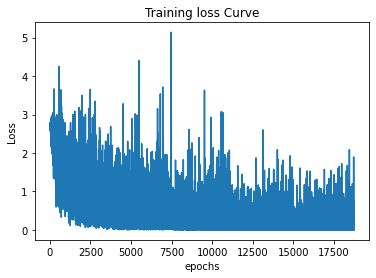

In [9]:
# 绘制函数
plt.plot(train_loss_list)
plt.title('Training loss Curve')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.show()


In [10]:
# save the model

torch.save(net.state_dict(), 'my_handwrite_recognize_model.ckpt')

In [11]:
test_set = myDataset(path_dir, transform=torchvision.transforms.ToTensor())
test_loader = DataLoader(test_set, batch_size, shuffle=True)

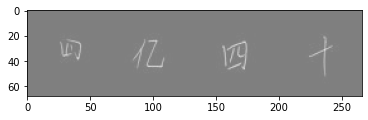

GroundTruth:  四     亿     四     十    
Predicted:  四     亿     四     十    


In [12]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))
# 开始预测
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

In [13]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data, target in test_loader:
        # calculate outputs by running images through the network
        outputs = net(data)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 97 %


In [14]:
# 随机获取部分训练数据
dataiter = iter(test_loader)
data, target = dataiter.next()
output = net(data)
_, predicted = torch.max(output.data, 1)
# 打印标签、预测
print('  label:', target)
print('predict:', predicted)

  label: tensor([ 0,  7, 14, 14])
predict: tensor([ 0,  7, 14, 14])
